In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import pandas_profiling as pp
from collections import Counter
#from imblearn.datasets import fetch_datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from matplotlib import pyplot as plt



#loading csv into dataframe

url = 'https://raw.githubusercontent.com/shantanudeshpande94/bankruptcy-prediction/master/5year.csv'
df1 = pd.read_csv(url)

Using TensorFlow backend.


In [8]:
#to replace '?' with NA values

df1.replace({'?': None},inplace =True)

In [9]:
#to check null values in a column

df1.isna().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [10]:

#converting from object to float64
# df1 = df1.convert_objects(convert_numeric=True)

df1['Attr1'] = pd.to_numeric(df1['Attr1'])
df1['Attr2'] = pd.to_numeric(df1['Attr2'])
df1['Attr3'] = pd.to_numeric(df1['Attr3'])
df1['Attr4'] = pd.to_numeric(df1['Attr4'])
df1['Attr5'] = pd.to_numeric(df1['Attr5'])
df1['Attr6'] = pd.to_numeric(df1['Attr6'])
df1['Attr7'] = pd.to_numeric(df1['Attr7'])
df1['Attr8'] = pd.to_numeric(df1['Attr8'])
df1['Attr9'] = pd.to_numeric(df1['Attr9'])
df1['Attr10'] = pd.to_numeric(df1['Attr10'])
df1['Attr11'] = pd.to_numeric(df1['Attr11'])
df1['Attr12'] = pd.to_numeric(df1['Attr12'])
df1['Attr13'] = pd.to_numeric(df1['Attr13'])
df1['Attr14'] = pd.to_numeric(df1['Attr14'])
df1['Attr15'] = pd.to_numeric(df1['Attr15'])
df1['Attr16'] = pd.to_numeric(df1['Attr16'])
df1['Attr17'] = pd.to_numeric(df1['Attr17'])
df1['Attr18'] = pd.to_numeric(df1['Attr18'])
df1['Attr19'] = pd.to_numeric(df1['Attr19'])
df1['Attr20'] = pd.to_numeric(df1['Attr20'])
df1['Attr21'] = pd.to_numeric(df1['Attr21'])
df1['Attr22'] = pd.to_numeric(df1['Attr22'])
df1['Attr23'] = pd.to_numeric(df1['Attr23'])
df1['Attr24'] = pd.to_numeric(df1['Attr24'])
df1['Attr25'] = pd.to_numeric(df1['Attr25'])
df1['Attr26'] = pd.to_numeric(df1['Attr26'])
df1['Attr27'] = pd.to_numeric(df1['Attr27'])
df1['Attr28'] = pd.to_numeric(df1['Attr28'])
df1['Attr29'] = pd.to_numeric(df1['Attr29'])
df1['Attr30'] = pd.to_numeric(df1['Attr30'])
df1['Attr31'] = pd.to_numeric(df1['Attr31'])
df1['Attr32'] = pd.to_numeric(df1['Attr32'])
df1['Attr33'] = pd.to_numeric(df1['Attr33'])
df1['Attr34'] = pd.to_numeric(df1['Attr34'])
df1['Attr35'] = pd.to_numeric(df1['Attr35'])
df1['Attr36'] = pd.to_numeric(df1['Attr36'])
df1['Attr37'] = pd.to_numeric(df1['Attr37'])
df1['Attr38'] = pd.to_numeric(df1['Attr38'])
df1['Attr39'] = pd.to_numeric(df1['Attr39'])
df1['Attr40'] = pd.to_numeric(df1['Attr40'])
df1['Attr41'] = pd.to_numeric(df1['Attr41'])
df1['Attr42'] = pd.to_numeric(df1['Attr42'])
df1['Attr43'] = pd.to_numeric(df1['Attr43'])
df1['Attr44'] = pd.to_numeric(df1['Attr44'])
df1['Attr45'] = pd.to_numeric(df1['Attr45'])
df1['Attr46'] = pd.to_numeric(df1['Attr46'])
df1['Attr47'] = pd.to_numeric(df1['Attr47'])
df1['Attr48'] = pd.to_numeric(df1['Attr48'])
df1['Attr49'] = pd.to_numeric(df1['Attr49'])
df1['Attr50'] = pd.to_numeric(df1['Attr50'])
df1['Attr51'] = pd.to_numeric(df1['Attr51'])
df1['Attr52'] = pd.to_numeric(df1['Attr52'])
df1['Attr53'] = pd.to_numeric(df1['Attr53'])
df1['Attr54'] = pd.to_numeric(df1['Attr54'])
df1['Attr55'] = pd.to_numeric(df1['Attr55'])
df1['Attr56'] = pd.to_numeric(df1['Attr56'])
df1['Attr57'] = pd.to_numeric(df1['Attr57'])
df1['Attr58'] = pd.to_numeric(df1['Attr58'])
df1['Attr59'] = pd.to_numeric(df1['Attr59'])
df1['Attr60'] = pd.to_numeric(df1['Attr60'])
df1['Attr61'] = pd.to_numeric(df1['Attr61'])
df1['Attr62'] = pd.to_numeric(df1['Attr62'])
df1['Attr63'] = pd.to_numeric(df1['Attr63'])
df1['Attr64'] = pd.to_numeric(df1['Attr64'])

df1.dtypes

df1.mean()


Attr1      -0.022347
Attr2       0.465086
Attr3       0.189155
Attr4       4.892476
Attr5      19.406758
             ...    
Attr61     10.941497
Attr62    241.978184
Attr63      9.127741
Attr64     65.276716
class       0.069374
Length: 65, dtype: float64

In [11]:
#check profile report of the dataset

profile = df1.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output_file5.html")

In [12]:
# dropping duplicate values 

df1.drop_duplicates(keep=False,inplace=True) 

In [13]:
#delete because of large number of missing values

del df1['Attr37']

In [14]:
#imputing missing values by mean

df1.fillna(df1.mean(), inplace=True)

#number of missing values

df1.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 64, dtype: int64

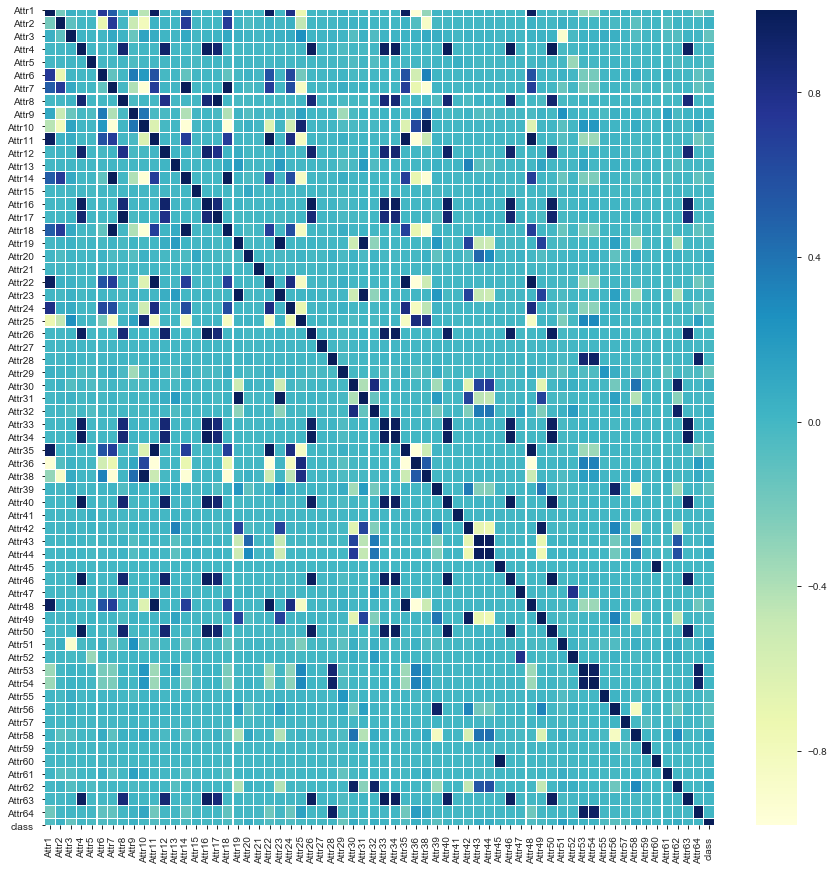

In [15]:
#correlation analysis

corrmat = df1.corr() 
  
corrmat.to_csv("correlation-analysis-5.csv")    
    
#plotting correlation graph   

import seaborn as sns 

f, ax = plt.subplots(figsize =(15, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [16]:
#delete because of high correlation

df1 = df1.drop(['Attr11','Attr16','Attr18','Attr22','Attr23','Attr26','Attr31','Attr33',
        'Attr34','Attr35','Attr38','Attr4','Attr40','Attr44','Attr46','Attr48','Attr49','Attr50','Attr54',
        'Attr56','Attr60','Attr62','Attr63','Attr64','Attr7','Attr8'], axis = 1)

#    # FEATURE SELECTION USING RANDOM FOREST

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [38]:

# Create a list of feature names
feat_labels = ['Attr1','Attr2','Attr3','Attr5','Attr6','Attr9','Attr10',
              'Attr12','Attr13','Attr14','Attr15','Attr17','Attr19','Attr20',
              'Attr21','Attr24','Attr25','Attr27','Attr28','Attr29','Attr30',
              'Attr32','Attr36','Attr39',
              'Attr41','Attr42','Attr43','Attr45','Attr47',
              'Attr51','Attr52','Attr53','Attr55','Attr57','Attr58','Attr59',
               'Attr61'
              ]


In [39]:
#Create X from the features
X = df1[feat_labels].values
#X = df1.iloc[:,:31]

# Create y from output
y = df1['class'].values.ravel()
#y = df1.iloc[:,31]


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)


('Attr1', 0.027591918833885107)
('Attr2', 0.016095535109824543)
('Attr3', 0.024633088062148565)
('Attr5', 0.017566884919741874)
('Attr6', 0.022341684789630053)
('Attr9', 0.024445543623779965)
('Attr10', 0.018169188943307345)
('Attr12', 0.020546371953517942)
('Attr13', 0.029548036841272433)
('Attr14', 0.027224671754813624)
('Attr15', 0.02586829696739935)
('Attr17', 0.016494773722498114)
('Attr19', 0.02392922848783537)
('Attr20', 0.014438103931648572)
('Attr21', 0.09961359554542011)
('Attr24', 0.038206224024632474)
('Attr25', 0.022354495094863536)
('Attr27', 0.06966182184329177)
('Attr28', 0.022296572829685384)
('Attr29', 0.02764127489026749)
('Attr30', 0.0163657865079402)
('Attr32', 0.016173909103129686)
('Attr36', 0.018125411522987286)
('Attr39', 0.056015258394595084)
('Attr41', 0.045584182145104)
('Attr42', 0.04182460764531087)
('Attr43', 0.018639018353756486)
('Attr45', 0.01903872933861213)
('Attr47', 0.013465773485520045)
('Attr51', 0.018854939962981758)
('Attr52', 0.015557464847323

In [42]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.015
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [43]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Attr21
Attr24
Attr27
Attr39
Attr41
Attr42
Attr58


In [44]:
X_filtered = sfm.transform(X)

In [52]:
X_filtered.shape

(5790, 7)

In [53]:
#converting X_filtered to Dataframe

X_filtered = pd.DataFrame(data=X_filtered,
          index=np.arange(1, 5791),
          columns=np.arange(1, 8))

#    RESAMPLING USING SMOTE

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#defining SMOTE
os = SMOTE(random_state=0)

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (4632, 7)
Number transactions y_train dataset:  (4632,)
Number transactions X_test dataset:  (1158, 7)
Number transactions y_test dataset:  (1158,)


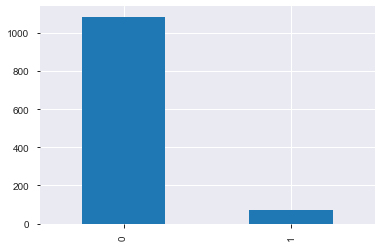

In [29]:
pd.Series(y_test).value_counts().plot.bar()

In [55]:
#Performing SMOTE resampling on our dataset

columns = X_train.columns

os_data_X, os_data_y = os.fit_sample(X_train, y_train.ravel())
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

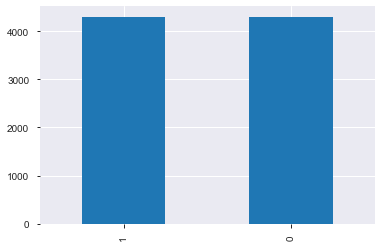

In [56]:
# observe that data has been balanced
pd.Series(os_data_y).value_counts().plot.bar()

# RANDOM FOREST

In [57]:
# Create a new random forest classifier for the most important features
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf.fit(os_data_X, os_data_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Limited feature Test Data
y_rf_pred = clf.predict(X_test)

# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_rf_pred)

0.9335060449050087

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

results = confusion_matrix(y_test, y_rf_pred)
print(results)
print(classification_report(y_test, y_rf_pred))

[[1032   52]
 [  25   49]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1084
           1       0.49      0.66      0.56        74

    accuracy                           0.93      1158
   macro avg       0.73      0.81      0.76      1158
weighted avg       0.94      0.93      0.94      1158



In [60]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_rf_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1032
False Positives:  52
False Negatives:  25
True Positives:  49


In [61]:
#Specificity
Specificity = tn/(tn+fp) 
print("Specificity {:0.2f}".format(Specificity))

#Recall 
Recall = tp/(tp+fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall))

#Precision
Precision = tp / (tp + fp)

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

Specificity 0.95
Recall / Sensitivity 0.66
F1 Score 0.56


#    # BUILDING KNN MODEL

In [62]:
import numpy as np
from sklearn import neighbors
import pandas as pd

In [63]:
clf_knn = neighbors.KNeighborsClassifier()

In [64]:
clf_knn.fit(os_data_X, os_data_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Limited feature Test Data
y_knn_pred = clf_knn.predict(X_test)

# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_knn_pred)

0.8376511226252159

In [66]:
accuracy = clf_knn.score(X_test, y_test)
print(accuracy)

0.8376511226252159


In [67]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_knn_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  922
False Positives:  162
False Negatives:  26
True Positives:  48


In [69]:
#Specificity
Specificity = tn/(tn+fp) 
print("Specificity {:0.2f}".format(Specificity))

#Recall 
Recall = tp/(tp+fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall))

#Precision
Precision = tp / (tp + fp)

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

Specificity 0.85
Recall / Sensitivity 0.65
F1 Score 0.34


# NEURAL NETWORK

In [70]:
from sklearn.preprocessing import StandardScaler 

In [71]:
# Define the scaler 
scaler = StandardScaler().fit(os_data_X)

# Scale the train set
X_nn_res = scaler.transform(os_data_X)

# Scale the test set
X_nn_test = scaler.transform(X_test)

In [76]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(7,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [77]:
# Model output shape
model.output_shape

# Model summary
model.summary

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

[array([[-6.76049292e-02, -2.05230057e-01, -2.28578418e-01,
         -3.49040091e-01, -7.77260363e-02, -4.74902064e-01,
          4.67702091e-01, -4.36204016e-01, -1.35892242e-01,
         -4.75821674e-01,  5.15149415e-01, -2.69975185e-01],
        [ 3.13361287e-01, -3.95232499e-01, -1.13066792e-01,
          1.11059248e-01,  3.55366051e-01, -3.70821148e-01,
         -1.33222133e-01, -3.45862865e-01,  1.89548552e-01,
         -4.94099855e-01, -3.47782671e-01, -3.35236013e-01],
        [-3.69468510e-01, -5.14218628e-01, -4.67713237e-01,
          4.46553886e-01, -1.02344245e-01,  1.46788418e-01,
         -1.37614667e-01, -5.42321980e-01, -3.44861656e-01,
         -3.41826349e-01,  2.12046921e-01, -5.19871712e-02],
        [ 4.00228739e-01, -3.80957127e-03, -5.49478114e-01,
         -5.29428720e-01, -2.09102035e-02, -6.10321760e-02,
         -3.01753432e-01, -3.60769451e-01,  4.89012897e-01,
         -4.31887090e-01, -1.76941335e-01,  5.11088073e-01],
        [-2.50213474e-01, -3.4537255

In [78]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_nn_res, os_data_y,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
8600/8600 [==============================] - 49s 6ms/step - loss: 0.5908 - accuracy: 0.7314
Epoch 2/20
8600/8600 [==============================] - 47s 5ms/step - loss: 0.5244 - accuracy: 0.7635
Epoch 3/20
8600/8600 [==============================] - 47s 6ms/step - loss: 0.4867 - accuracy: 0.7950
Epoch 4/20
8600/8600 [==============================] - 47s 6ms/step - loss: 0.4576 - accuracy: 0.8133
Epoch 5/20
8600/8600 [==============================] - 48s 6ms/step - loss: 0.4379 - accuracy: 0.8194
Epoch 6/20
8600/8600 [==============================] - 48s 6ms/step - loss: 0.4269 - accuracy: 0.8230
Epoch 7/20
8600/8600 [==============================] - 47s 5ms/step - loss: 0.4239 - accuracy: 0.8281
Epoch 8/20
8600/8600 [==============================] - 48s 6ms/step - loss: 0.4158 - accuracy: 0.8278
Epoch 9/20
8600/8600 [==============================] - 49s 6ms/step - loss: 0.4101 - accuracy: 0.8291
Epoch 10/20
8600/8600 [==============================] - 48s 6ms/step - l

In [87]:
y_nn_pred = model.predict(X_test)

In [81]:
score = model.evaluate(X_nn_test, y_test,verbose=1)

print(score)

1158/1158 [==============================] - 0s 174us/step
[0.7156369352587764, 0.8739205598831177]


In [89]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_nn_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets